<a href="https://colab.research.google.com/github/jadsonbarbosab/Sirius/blob/main/Master_Semana1_Exercicios_Jadson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `media_saeb_mat`, `media_saeb_port` e `media_ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ideb = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Sirius/Arquivo/ideb.csv')

In [ ]:
ideb_filter = ideb[['ano','id_municipio','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]
ideb_filter_2019 = ideb_filter[ideb_filter['ano']==2019].groupby(['id_municipio']).mean()
ideb_filter_2019.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,
1100015,2019.0,253.283750,242.246250,5.050000
1100023,2019.0,248.223750,243.618750,4.762500
1100031,2019.0,229.495000,221.500000,4.850000
1100049,2019.0,259.150000,249.888889,5.200000
1100056,2019.0,266.288571,254.334286,5.642857


In [ ]:
#ideb_2019_agrupado = ideb_filter_2019.groupby(['id_municipio']).mean()
#ideb_2019_agrupado.head()

### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
pib = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Sirius/Arquivo/pib.csv')
pib.head(2)

,ano,id_municipio,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,1100015,111290995,7549266,103741729,27013223,9376871,24651113,42700523
1,2002,1100023,449592816,42665972,406926845,28590178,99922936,161851549,116562182


In [ ]:
pib_filter = pib[['ano','id_municipio','pib','impostos_liquidos']]
pib_filter_2019 = pib_filter[pib_filter['ano']==2019].groupby('id_municipio').mean()
pib_filter_2019.head(2)

,ano,pib,impostos_liquidos
id_municipio,,,
1100015,2019.0,4.956288e+08,29350985.0
1100023,2019.0,2.578830e+09,284397627.0


In [ ]:
#pib_2019_agrupado = pib_filter_2019.groupby(['id_municipio']).mean()
#pib_2019_agrupado.head()

### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
#uniao = pd.concat([ideb_2019_agrupado,pib_2019_agrupado], axis =1, join = 'outer',ignore_index = False ) #COMBINANDO 2 DATAFRAMES
#uniao = pd.merge(ideb_filter_2019,pib_filter_2019, how = 'inner', on = 'id_municipio')
uniao = ideb_filter_2019.merge(pib_filter_2019, on = 'id_municipio', how = 'inner')
uniao.head()

,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
id_municipio,,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,76671376.0


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
#VERIFICANDO QUANTIDADE DE VALORES NÃO-NULOS POR COLUNA:
print(uniao.count())

ano_x                          5570
nota_saeb_matematica           5549
nota_saeb_lingua_portuguesa    5549
ideb                           5549
ano_y                          5570
pib                            5570
impostos_liquidos              5570
dtype: int64


In [ ]:
#VERIFICANDO QUANTIDADE DE VALORES NULOS POR COLUNA:
uniao.isna().sum()

ano_x                           0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
ano_y                           0
pib                             0
impostos_liquidos               0
dtype: int64

In [ ]:
#EXCLUINDO VALORES NULOS, ONDE TODA A LINHA TEM VALORES NULOS
uniao.dropna(inplace=True)
uniao.head()

,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
id_municipio,,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,76671376.0


In [ ]:
#DEPOIS DE EXCLUIR AS LINHAS COM NULOS, FAZER CHECK
uniao.isna().sum()

ano_x                          0
nota_saeb_matematica           0
nota_saeb_lingua_portuguesa    0
ideb                           0
ano_y                          0
pib                            0
impostos_liquidos              0
dtype: int64

In [ ]:
# AS COLUNA DE ANO, COMO ESTAMOS USANDO SÓ 2019, TORNA-SE IRRELEVANTE PARA NOSSA ANÁLISE E SERÁ EXCLUÍDA.

In [ ]:
uniao_limpa = uniao[['nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb','pib','impostos_liquidos']]
uniao_limpa.head(5)

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,
1100015,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1100023,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
1100031,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
1100049,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
1100056,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [ ]:
uniao_limpa.dtypes

nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
pib                            float64
impostos_liquidos              float64
dtype: object



*   id_municipio: Qualitativa Nominal
*   nota_saeb_matematica: Contínua

*   nota_saeb_lingua_portuguesa: Contínua
*   ideb: Contínua

*   pib: Contínua (valor financeiros são contínuos)
*   impostos_liquidos: Contínua (valor financeiros são contínuos)

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [ ]:
uniao_limpa.corr(method='pearson')

,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
nota_saeb_matematica,1.000000,0.960775,0.788224,0.043748,0.039766
nota_saeb_lingua_portuguesa,0.960775,1.000000,0.725772,0.056341,0.050434
ideb,0.788224,0.725772,1.000000,0.037105,0.036383
pib,0.043748,0.056341,0.037105,1.000000,0.981030
impostos_liquidos,0.039766,0.050434,0.036383,0.981030,1.000000


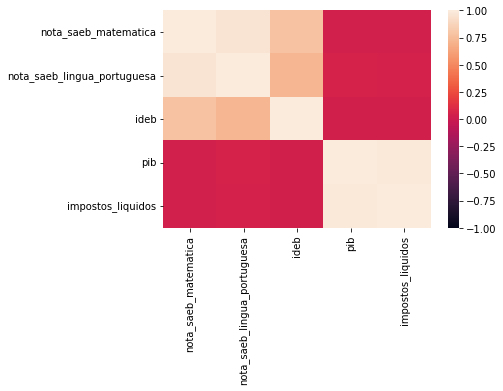

In [ ]:
import seaborn as sns
sns.heatmap(uniao_limpa.corr(), vmin=-1, vmax=1, annot=False);

*   Como observado na tabela e no Heatmap, correlação entre IDEB e PIB é 0.037, então não é possível afirmar que há qualquer correlação.
Existe correlação forte entre PIB e Impostos Líquidos e Notas de Português e Notas de Matemática.



### O que significa a correlação das variáveis `id_municipio` e `ideb`?

O ID_Município é uma variável Nominal, apesar de ser um número. Logo, não faz sentido avaliar ela numa correlação.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e procurar por correlações entre algumas das colunas.

In [ ]:
import pandas as pd
seg = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Sirius/Arquivo/seg_rj.csv')

In [ ]:
seg.corr(method='pearson')
#seg.corr(method='pearson').to_excel("seg_rj_corr.xlsx")  

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,1.000000,-0.040634,-0.810532,-0.194124,-0.408719,-0.806135,0.029745,-0.717188,0.433905,-0.639639,...,0.339497,0.530566,-0.476968,-0.251751,-0.780525,-0.193519,-0.095564,0.156925,0.301306,-0.202425
mes,-0.040634,1.000000,-0.135580,-0.015680,-0.050424,-0.133394,-0.139028,-0.159874,-0.102017,0.016986,...,0.118793,0.005387,-0.023652,0.002843,-0.135882,-0.007302,-0.048925,0.086681,-0.000666,0.048121
hom_doloso,-0.810532,-0.135580,1.000000,0.279555,0.583279,0.998978,0.204999,0.958242,-0.114282,0.471016,...,-0.416145,-0.238869,0.253732,0.149283,0.752494,0.139297,0.286609,-0.122424,-0.212857,0.197284
lesao_corp_morte,-0.194124,-0.015680,0.279555,1.000000,0.184946,0.296978,0.224299,0.332076,-0.023712,0.062806,...,-0.190357,0.006393,-0.033772,-0.005570,0.222409,-0.029623,0.142911,-0.213192,-0.070242,-0.001552
latrocinio,-0.408719,-0.050424,0.583279,0.184946,1.000000,0.616027,0.100075,0.583418,0.060416,0.207827,...,-0.194366,-0.123439,0.065285,0.168319,0.291879,-0.009833,0.165794,-0.085815,0.041980,0.202966
cvli,-0.806135,-0.133394,0.998978,0.296978,0.616027,1.000000,0.206587,0.959612,-0.108220,0.466091,...,-0.413062,-0.236454,0.247516,0.152257,0.744534,0.133405,0.285166,-0.127535,-0.204819,0.200151
hom_por_interv_policial,0.029745,-0.139028,0.204999,0.224299,0.100075,0.206587,1.000000,0.473421,-0.063985,-0.435845,...,-0.314996,0.445770,-0.529823,-0.492061,0.106065,0.030847,0.013395,-0.013309,-0.291145,-0.075337
letalidade_violenta,-0.717188,-0.159874,0.958242,0.332076,0.583418,0.959612,0.473421,1.000000,-0.115642,0.294571,...,-0.478149,-0.052028,0.070789,-0.004238,0.700866,0.129260,0.282283,-0.130153,-0.267623,0.158459
tentat_hom,0.433905,-0.102017,-0.114282,-0.023712,0.060416,-0.108220,-0.063985,-0.115642,1.000000,0.016947,...,0.425906,0.370780,0.086503,0.347545,-0.214194,-0.078210,0.248074,-0.123464,0.660348,0.132141
lesao_corp_dolosa,-0.639639,0.016986,0.471016,0.062806,0.207827,0.466091,-0.435845,0.294571,0.016947,1.000000,...,0.061721,-0.362407,0.926278,0.739240,0.469031,0.095542,0.047231,-0.222952,0.308915,0.255456


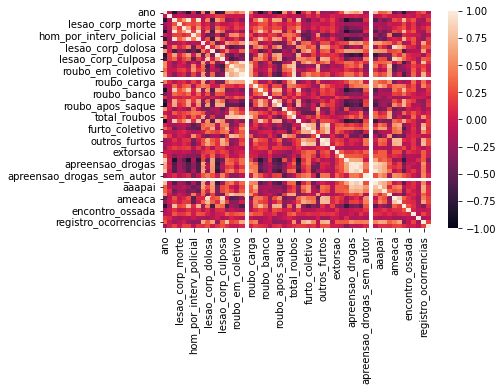

In [ ]:
sns.heatmap(seg.corr(), vmin=-1, vmax=1, annot=False);

Como visto na tabela acima e no heatmap, tem colunas se relacionam muito forte de maneira positiva e negativa. Alguns exemplos de correlações fortes ou muito fortes:


*   Homicídio Doloso possui alta correlação positiva com Taxa de Crimes Violentos Letais Intencionais (cvli), furto de veículos e roubo a residências;  
*   Furto de biciclieta possui alta correlação positiva com roubo de celular e com roubo de bicicleta;


*   Tráfico de drogas possui alta correlação positiva com apreensão de drogas, posse de drogas, Taxa de Auto de Prisão em Flagrante (apf) e Taxa de Auto de Apreensão de Adolescente por Prática de Ato Infracional (aaapai).





### Atividade 8: Selecione os dados apenas para o ano de 2020 e apenas as colunas `mês`, `hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial`, e `trafico_drogas`

In [ ]:
#seg.head()
seg_2020 = seg[seg['ano'] == 2020]
seg_filter = seg_2020[['mes','hom_doloso','lesao_corp_morte','latrocinio','cvli','hom_por_interv_policial','trafico_drogas']]
seg_filter.head()

#pib_filter[pib_filter['ano']==2019].groupby('id_municipio').mean()

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2.07,0.02,0.05,2.14,0.90,5.06
205,2,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2.16,0.01,0.05,2.22,0.66,4.70
207,4,1.80,0.03,0.03,1.86,1.03,5.29
208,5,1.57,0.00,0.03,1.61,0.75,5.39


In [ ]:
seg_filter.corr(method='spearman')

,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
mes,1.000000,-0.468531,0.011427,-0.061063,-0.461538,-0.489510,-0.028070
hom_doloso,-0.468531,1.000000,-0.064753,0.423852,0.993007,0.664336,-0.396494
lesao_corp_morte,0.011427,-0.064753,1.000000,-0.031304,-0.026663,0.159977,0.053513
latrocinio,-0.061063,0.423852,-0.031304,1.000000,0.456180,0.017960,-0.252321
cvli,-0.461538,0.993007,-0.026663,0.456180,1.000000,0.678322,-0.357897
hom_por_interv_policial,-0.489510,0.664336,0.159977,0.017960,0.678322,1.000000,0.249124
trafico_drogas,-0.028070,-0.396494,0.053513,-0.252321,-0.357897,0.249124,1.000000


Nesse cenário, irei considerar correlação forte aquelas que tem valor acima de 0,6, que são os seguintes:


*   Taxa de Crimes Violentos Letais Intencionais (cvli) e Homicídio Doloso, com 0,99 (muito forte),
*   Homicídio Doloso e Homicídio por intervenção policial (0.66);


*   Taxa de Crimes Violentos Letais Intencionais (cvli) e  Homicídio por intervenção policial (0.68).



